<a href="https://colab.research.google.com/github/ztahmasbi77/Algorithms/blob/master/Product_growth_MLP_ipyneh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [46]:
# Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/wheat_result.csv")
df.head()

,@YEAR,DOY,DAP,GSTD,LAID,RWAD,LWAD,SWAD,HIAD,CWAD,SLAD,RDPD
0,1981,289,0,0.00,0.0,0,0,0,0.0,0,-99,0.05
1,1981,290,1,5.58,0.0,0,0,0,0.0,0,-99,0.05
2,1981,291,2,6.54,0.0,1,0,0,0.0,0,-99,0.07
3,1981,292,3,7.81,0.0,2,0,0,0.0,0,-99,0.09
4,1981,293,4,9.69,0.0,3,0,0,0.0,0,-99,0.11


In [47]:
# Separating X, Y from main dataset
X = df.drop(['GSTD'],axis=1)
Y = df[["GSTD"]]

In [48]:
"""   One Hot Encoding:
          1.One Hot Encoder
          2.Transformer     """
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# One Hot Encoder
one_hot = OneHotEncoder()
cat_feature = ['@YEAR'] 
transformer = ColumnTransformer([('one_hot', one_hot, cat_feature)],
                                remainder='passthrough')
# Transformer
trans_x = transformer.fit_transform(X)
trans_x = pd.DataFrame(trans_x)
trans_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,289.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.0,0.05
1,1.0,0.0,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.0,0.05
2,1.0,0.0,291.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,-99.0,0.07
3,1.0,0.0,292.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,-99.0,0.09
4,1.0,0.0,293.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,-99.0,0.11


In [49]:
# Train & Test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(trans_x, Y, test_size=0.2)
print (x_train.shape,y_train.shape)
print (x_test.shape,y_test.shape)

(200, 12) (200, 1)
(51, 12) (51, 1)


In [50]:
# Creating  a model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(X[0])]),
        Dense(1)
    ])
    # Training
    model.compile( 
                  loss='mae',
                  metrics=['mae', 'mse'])
    return model

In [51]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [52]:
X = np.array(x_train)
Y = np.array(y_train)
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(X, Y, epochs=1000, verbose=0, validation_split = 0.15,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

rmse_final = np.sqrt(float(hist['val_mae'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
...........................................................
Final Root Mean Square Error on validation set: 2.516


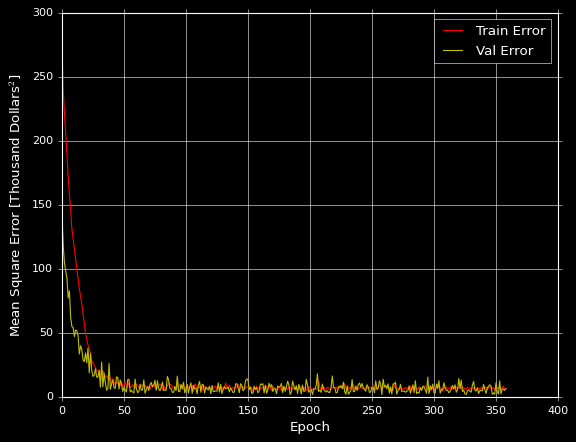

In [59]:
# Line plot
import matplotlib.pyplot as plt
from matplotlib import style
style.use("dark_background")


def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mae'], color = 'r', label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], color = 'y', label = 'Val Error')
    plt.legend()
    plt.show()

plot_history()

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                240       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
